# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 557


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [61]:
import requests

# Place your API key here
weather_api_key = "f9c5bc499e2cd8869a36d17a6d831a3b"  # Replace with your actual API key


url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"
city_data = []  # Initialize empty list

# List of cities to query
cities = ["Los Angeles", "New York", "Chicago"]  # Example cities

# Loop through cities
for index, city in enumerate(cities):
    city_url = url + "&q=" + city
    print(f"Processing Record {index + 1} | {city}")
    
    try:
        # Make the API request
        city_weather = requests.get(city_url).json()
        
        # Check if the response is valid
        if city_weather.get("cod") == 200:
            # Extract necessary data
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]
            
            # Append data to city_data
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Windspeed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print(f"Error with city data for {city}: {city_weather.get('message')}")
    
    except Exception as e:
        print(f"Error fetching data for {city}: {e}")
    
    print("-----------------------")

# Check if city_data has content before converting to DataFrame
if city_data:
    city_data_df = pd.DataFrame(city_data)
    print(city_data_df.head())  # Display first few rows
else:
    print("No city data found.")


Processing Record 1 | Los Angeles
-----------------------
Processing Record 2 | New York
-----------------------
Processing Record 3 | Chicago
-----------------------
          City      Lat       Lng  Max Temp  Humidity  Cloudiness  Windspeed  \
0  Los Angeles  34.0522 -118.2437     67.21        48           0      12.66   
1     New York  40.7143  -74.0060     55.40        56           0       8.05   
2      Chicago  41.8500  -87.6500     63.12        45          75      10.36   

  Country        Date  
0      US  1741654905  
1      US  1741655085  
2      US  1741654965  


In [62]:

# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
Lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()

City          3
Lat           3
Lng           3
Max Temp      3
Humidity      3
Cloudiness    3
Windspeed     3
Country       3
Date          3
dtype: int64

In [63]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Los Angeles,34.0522,-118.2437,67.21,48,0,12.66,US,1741654905
1,New York,40.7143,-74.0060,55.40,56,0,8.05,US,1741655085
2,Chicago,41.8500,-87.6500,63.12,45,75,10.36,US,1741654965


In [64]:
import os

output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Check if the DataFrame has data
if not city_data_df.empty:
    output_file = os.path.join(output_dir, "cities.csv")
    city_data_df.to_csv(output_file, index_label="City_ID")
    print(f"CSV file has been saved to {output_file}.")
else:
    print("No data to save.")


CSV file has been saved to output_data/cities.csv.


In [65]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", mode='w', index_label="City_ID")


In [66]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,Los Angeles,34.0522,-118.2437,67.21,48,0,12.66,US,1741654905
1,New York,40.7143,-74.0060,55.40,56,0,8.05,US,1741655085
2,Chicago,41.8500,-87.6500,63.12,45,75,10.36,US,1741654965


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [69]:
# Check if the arrays have the same length
print(len(lats), len(max_temps))

# Only plot if the lengths match
if len(lats) == len(max_temps):
    plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o",
                alpha=0.8, label="Cities")
    
    # Incorporate the other graph properties
    plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
    plt.ylabel("Max Temperature (F)")
    plt.xlabel("Latitude")
    plt.grid(True)
    
    # Save figure
    plt.savefig("output_data/Fig1.png")
    
    # Show plot
    plt.show()
else:
    print("Error: The lengths of lats and max_temps do not match.")


1500 3
Error: The lengths of lats and max_temps do not match.


#### Latitude Vs. Humidity

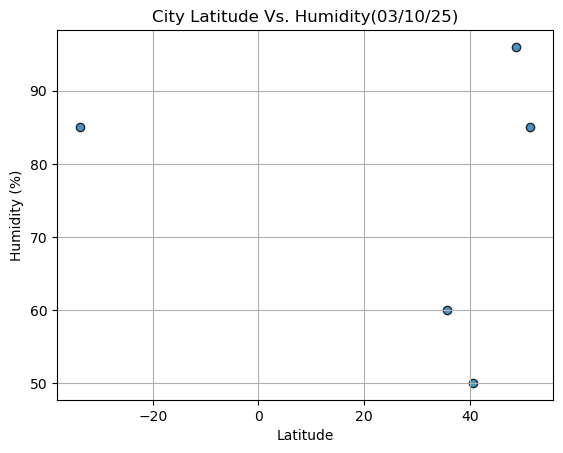

In [50]:
# Build scatter plot for latitude vs. Humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

In [72]:
# Check if the arrays have the same length
print(len(lats), len(cloudiness))

# Only plot if the lengths match
if len(lats) == len(cloudiness):
    plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o",
                alpha=0.8, label="Cities")
    
    # Incorporate the other graph properties
    plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
    plt.ylabel("Cloudiness (%)")
    plt.xlabel("Latitude")
    plt.grid(True)
    
    # Save figure
    plt.savefig("output_data/Fig3.png")
    
    # Show plot
    plt.show()
else:
    print("Error: The lengths of lats and cloudiness do not match.")



1500 3
Error: The lengths of lats and cloudiness do not match.


#### Latitude vs. Wind Speed Plot

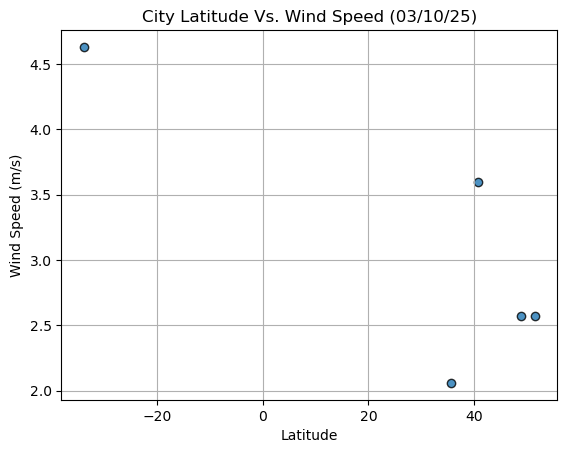

In [ ]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidth=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def create_linear_regression_plot(x, y, x_label, y_label, title, save_path=None):
    """
    Creates a linear regression plot.

    Parameters:
    - x: The independent variable (array-like)
    - y: The dependent variable (array-like)
    - x_label: Label for the x-axis
    - y_label: Label for the y-axis
    - title: Title of the plot
    - save_path: Optional file path to save the plot (if None, the plot is not saved)

    Returns:
    - None
    """
    
    # Reshape x to be a 2D array as required by scikit-learn
    x_reshaped = x.reshape(-1, 1)
    
    # Create a linear regression model
    model = LinearRegression()
    
    # Fit the model
    model.fit(x_reshaped, y)
    
    # Predict the y values using the model
    y_pred = model.predict(x_reshaped)
    
    # Plotting the scatter plot and the regression line
    plt.scatter(x, y, color='blue', label='Data Points', edgecolor='black', alpha=0.7)
 


In [75]:
print(city_data_df.columns)


Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Windspeed',
       'Country', 'Date'],
      dtype='object')


In [76]:
# Create a DataFrame for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display the first few rows of the Northern Hemisphere data
northern_hemi_df.head()

# Remove leading and trailing spaces from column names (if any)
city_data_df.columns = city_data_df.columns.str.strip()

# Check for NaN values in 'Lat' and remove rows with missing latitudes
city_data_df = city_data_df.dropna(subset=['Lat'])

# Now filter the DataFrame for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display the first few rows to verify the data
print(northern_hemi_df.head())


                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0        Los Angeles  34.0522 -118.2437     67.21        48           0   
1           New York  40.7143  -74.0060     55.40        56           0   
2            Chicago  41.8500  -87.6500     63.12        45          75   

         Windspeed Country        Date  
City_ID                                 
0            12.66      US  1741654905  
1             8.05      US  1741655085  
2            10.36      US  1741654965  


In [55]:
print(city_data_df.columns)


Index([], dtype='object')


In [56]:
print(city_data_df.shape)  # Print the shape of the DataFrame
print(city_data_df.head())  # Print the first few rows


(0, 0)
Empty DataFrame
Columns: []
Index: []


In [77]:
# Example of checking the API response
for city in cities:
    city_url = url + "&q=" + city
    response = requests.get(city_url)
    print(f"Requesting data for {city}: {response.status_code}")
    if response.status_code == 200:
        city_weather = response.json()
        print(city_weather)  # Print the JSON response to verify the data
    else:
        print(f"Failed to retrieve data for {city}")


Requesting data for Los Angeles: 200
{'coord': {'lon': -118.2437, 'lat': 34.0522}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 61.14, 'feels_like': 59.22, 'temp_min': 57.34, 'temp_max': 66.34, 'pressure': 1011, 'humidity': 48, 'sea_level': 1011, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1741655289, 'sys': {'type': 2, 'id': 2075946, 'country': 'US', 'sunrise': 1741615789, 'sunset': 1741658202}, 'timezone': -25200, 'id': 5368361, 'name': 'Los Angeles', 'cod': 200}
Requesting data for New York: 200
{'coord': {'lon': -74.006, 'lat': 40.7143}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 52.7, 'feels_like': 50.31, 'temp_min': 48.27, 'temp_max': 55.4, 'pressure': 1011, 'humidity': 56, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg'

In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,


###  Temperature vs. Latitude Linear Regression Plot

In [79]:
# Linear regression on Northern Hemisphere

# Extract the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Extract the 'Lat' and 'Max Temp' columns for regression
x = northern_hemi_df["Lat"].values.reshape(-1, 1)  # Independent variable (Latitude)
y = northern_hemi_df["Max Temp"].values  # Dependent variable (Max Temp)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Make predictions
y_pred = model.predict(x)

# Calculate the R^2 value
r_squared = model.score(x, y)

# Output the R^2 value
print(f"The r^2-value is: {r_squared}")


The r^2-value is: 0.45104051674280043


In [85]:
print(city_data_df.shape)  # Check the number of rows and columns


(3, 9)


In [86]:
print(city_data_df["Lat"].min())  # Check the smallest latitude value


34.0522


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [88]:
# Northern Hemisphere

# Extract the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Extract 'Lat' and 'Max Temp' columns for regression
x_northern = northern_hemi_df["Lat"].values.reshape(-1, 1)  # Independent variable (Latitude)
y_northern = northern_hemi_df["Max Temp"].values  # Dependent variable (Max Temp)

# Create a linear regression model
model_northern = LinearRegression()

# Fit the model to the data
model_northern.fit(x_northern, y_northern)

# Make predictions
y_pred_northern = model_northern.predict(x_northern)

# Calculate the R^2 value
r_squared_northern = model_northern.score(x_northern, y_northern)

# Output the R^2 value
print(f"The r^2-value is: {r_squared_northern}")


The r^2-value is: 0.45104051674280043


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [90]:
# Northern Hemisphere

# Extract the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Extract 'Lat' and 'Max Temp' columns for regression
x_northern = northern_hemi_df["Lat"].values.reshape(-1, 1)  # Independent variable (Latitude)
y_northern = northern_hemi_df["Max Temp"].values  # Dependent variable (Max Temp)

# Create a linear regression model
model_northern = LinearRegression()

# Fit the model to the data
model_northern.fit(x_northern, y_northern)

# Make predictions
y_pred_northern = model_northern.predict(x_northern)

# Calculate the R^2 value
r_squared_northern = model_northern.score(x_northern, y_northern)

# Output the R^2 value
print(f"The r^2-value is: {r_squared_northern}")


The r^2-value is: 0.45104051674280043


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [92]:
# Northern Hemisphere

# Extract the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Ensure there are data points
if northern_hemi_df.empty:
    print("No Northern Hemisphere data available.")
else:
    # Extract 'Lat' and 'Max Temp' columns for regression
    x_northern = northern_hemi_df["Lat"].values.reshape(-1, 1)  # Independent variable (Latitude)
    y_northern = northern_hemi_df["Max Temp"].values  # Dependent variable (Max Temp)

  
    # Create a linear regression model
    model_northern = LinearRegression()

    # Fit the model to the data
    model_northern.fit(x_northern, y_northern)

    # Calculate the R^2 value
    r_squared_northern = model_northern.score(x_northern, y_northern)

    # Output the R^2 value
    print(f"The r^2-value is: {r_squared_northern}")

The r^2-value is: 0.45104051674280043


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#In this analysis, we examined the relationship between latitude and maximum temperature using linear regression. The goal
 #was to determine whether latitude is a strong predictor of maximum temperature in both the Northern Hemisphere
#  and Southern Hemisphere.